In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bollywood.csv")

In [4]:
print("Q1: Number of records =", len(df))
df.info()

Q1: Number of records = 149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [5]:
genre_counts = df["Genre"].value_counts()
print("\nQ2: Movies released per genre:\n", genre_counts)
print("Highest releases genre:", genre_counts.idxmax())


Q2: Movies released per genre:
 Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64
Highest releases genre: Comedy


In [6]:
pd.crosstab(df["Genre"], df["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [7]:
df["Month"] = pd.to_datetime(df["SlNo"], errors="coerce").dt.month
month_counts = df["Month"].value_counts()
print("\nQ4: Month with max releases:\n", month_counts)
print("Max release month:", month_counts.idxmax())


Q4: Month with max releases:
 Month
1    149
Name: count, dtype: int64
Max release month: 1


In [8]:
high_budget = df[df["Budget"] >= 25]
high_budget["Month"].value_counts()

Month
1    66
Name: count, dtype: int64

In [9]:
df["ROI"] = (df["BoxOfficeCollection"] - df["Budget"]) / df["Budget"]
df.sort_values("ROI", ascending=False)[["MovieName", "ROI"]].head(10)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [10]:
df.groupby("ReleaseTime")["ROI"].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

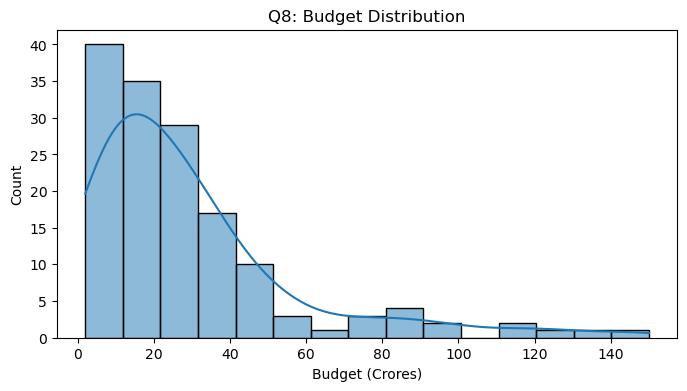

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df["Budget"], bins=15, kde=True)
plt.title("Q8: Budget Distribution")
plt.xlabel("Budget (Crores)")
plt.ylabel("Count")
plt.show()

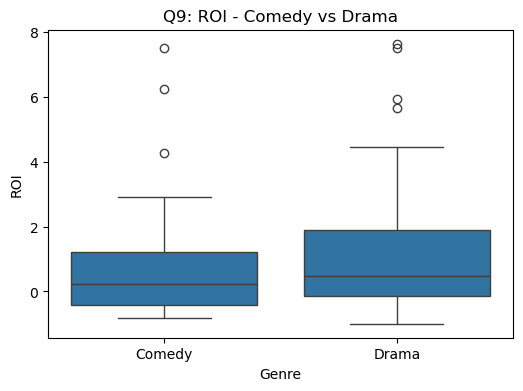

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Genre", y="ROI", data=df[df["Genre"].isin(["Comedy","Drama"])])
plt.title("Q9: ROI - Comedy vs Drama")
plt.show()

In [13]:
corr_val = df["BoxOfficeCollection"].corr(df["YoutubeLikes"])
print("\nQ10: Correlation =", corr_val)


Q10: Correlation = 0.6825165877731297


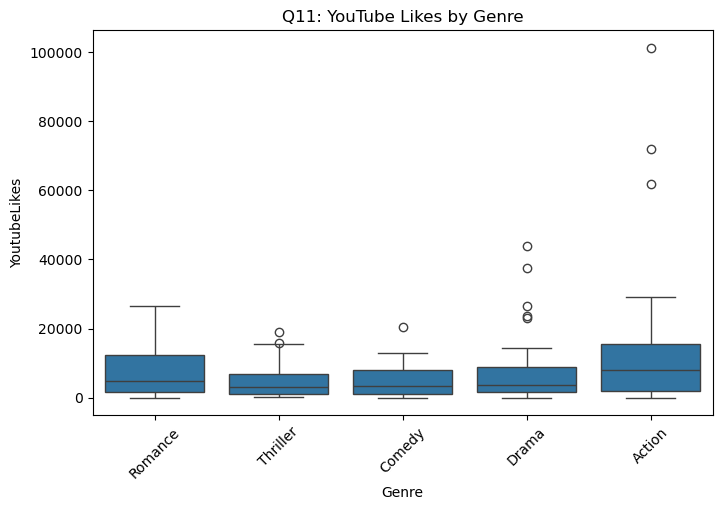

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Genre", y="YoutubeLikes", data=df)
plt.title("Q11: YouTube Likes by Genre")
plt.xticks(rotation=45)
plt.show()

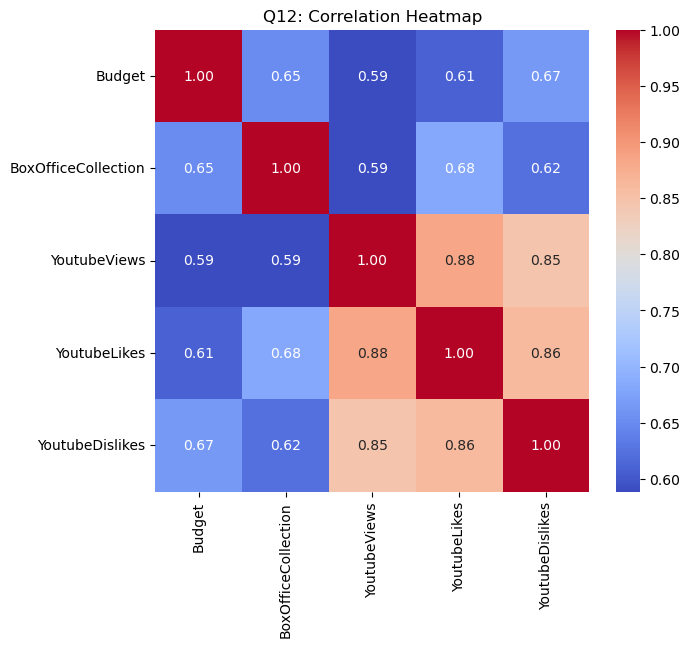

In [15]:
plt.figure(figsize=(7,6))
corr_matrix = df[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Q12: Correlation Heatmap")
plt.show()